✅ All libraries imported successfully!

STEP 1: LOADING DATASET

Dataset Shape: (569, 32)
Number of Features: 30
Number of Samples: 569

Target Distribution:
diagnosis_label
benign       357
malignant    212
Name: count, dtype: int64

Class Balance:
diagnosis_label
benign       0.627417
malignant    0.372583
Name: proportion, dtype: float64

First 5 samples:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0

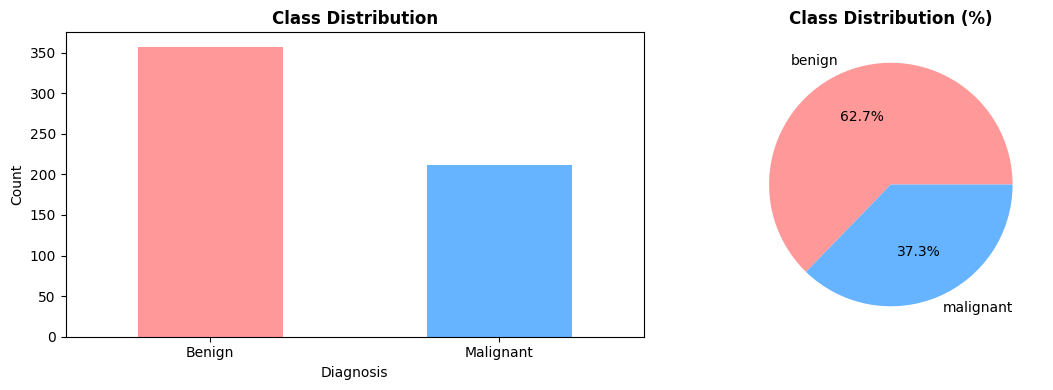

✅ Saved: class_distribution.png

STEP 4: FEATURE ENGINEERING
Features shape: (569, 30)
Target shape: (569,)

Features:
  1. mean radius
  2. mean texture
  3. mean perimeter
  4. mean area
  5. mean smoothness
  6. mean compactness
  7. mean concavity
  8. mean concave points
  9. mean symmetry
  10. mean fractal dimension
  11. radius error
  12. texture error
  13. perimeter error
  14. area error
  15. smoothness error
  16. compactness error
  17. concavity error
  18. concave points error
  19. symmetry error
  20. fractal dimension error
  21. worst radius
  22. worst texture
  23. worst perimeter
  24. worst area
  25. worst smoothness
  26. worst compactness
  27. worst concavity
  28. worst concave points
  29. worst symmetry
  30. worst fractal dimension

STEP 5: TRAIN-TEST SPLIT
Training set size: 455 samples
Testing set size: 114 samples
Training set proportion: 80.0%
Testing set proportion: 20.0%

STEP 6: FEATURE SCALING
✅ Feature scaling completed using StandardScaler
   

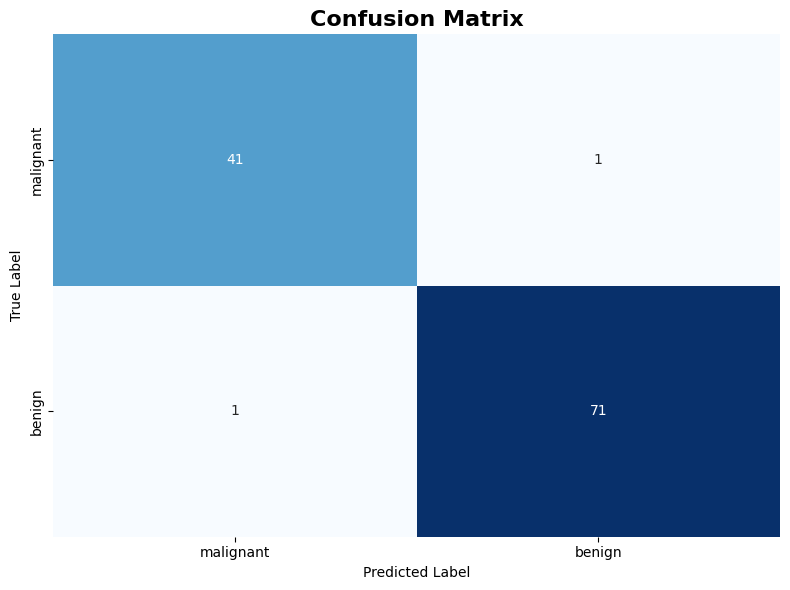

✅ Saved: confusion_matrix.png

STEP 9: MODEL PERSISTENCE
✅ Model saved: breast_cancer_model.pkl
✅ Scaler saved: scaler.pkl
✅ Metadata saved: model_metadata.json

STEP 10: DEMONSTRATE MODEL RELOADING
✅ Model loaded successfully from disk!
✅ Scaler loaded successfully from disk!

🔬 SAMPLE PREDICTION (using reloaded model):
   Actual label: malignant
   Predicted label: malignant
   Confidence: 100.00%
   Match: ✅ Correct

PROJECT SUMMARY

✅ COMPLETED TASKS:
   1. ✅ Loaded Wisconsin Breast Cancer dataset
   2. ✅ Performed data preprocessing
   3. ✅ Handled missing values (none found)
   4. ✅ Applied feature scaling (StandardScaler)
   5. ✅ Trained Logistic Regression model
   6. ✅ Evaluated model performance
   7. ✅ Saved model to disk (pickle)
   8. ✅ Demonstrated model reloading

📊 FINAL PERFORMANCE:
   Accuracy:  98.25%
   Precision: 0.9861
   Recall:    0.9861
   F1-Score:  0.9861

📁 FILES GENERATED:
   1. breast_cancer_model.pkl    - Trained model
   2. scaler.pkl                 - F

In [1]:
"""
BREAST CANCER CLASSIFICATION PROJECT
Jimoh-Alabi Islamiat Modupeoluwa
Reg Number:250000033

This notebook demonstrates:
1. Loading Wisconsin Breast Cancer dataset
2. Data preprocessing
3. Model training (Logistic Regression)
4. Model evaluation
5. Model persistence
"""

# ============================================================================
# CELL 1: Import Libraries
# ============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
import pickle
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

# ============================================================================
# CELL 2: Load Dataset
# ============================================================================
print("\n" + "="*80)
print("STEP 1: LOADING DATASET")
print("="*80)

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['diagnosis'] = y
df['diagnosis_label'] = df['diagnosis'].map({0: 'malignant', 1: 'benign'})

print(f"\nDataset Shape: {df.shape}")
print(f"Number of Features: {len(data.feature_names)}")
print(f"Number of Samples: {len(df)}")
print(f"\nTarget Distribution:")
print(df['diagnosis_label'].value_counts())
print(f"\nClass Balance:")
print(df['diagnosis_label'].value_counts(normalize=True))

# Display first few rows
print("\nFirst 5 samples:")
print(df.head())

# ============================================================================
# CELL 3: Data Preprocessing
# ============================================================================
print("\n" + "="*80)
print("STEP 2: DATA PREPROCESSING")
print("="*80)

# Check for missing values
print("\n2.1 Checking for missing values...")
missing_values = df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")
if missing_values.sum() == 0:
    print("✅ No missing values found!")

# Check data types
print("\n2.2 Data types:")
print(df.dtypes.value_counts())

# Statistical summary
print("\n2.3 Statistical Summary:")
print(df.describe())

# ============================================================================
# CELL 4: Exploratory Data Analysis
# ============================================================================
print("\n" + "="*80)
print("STEP 3: EXPLORATORY DATA ANALYSIS")
print("="*80)

# Visualize class distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df['diagnosis_label'].value_counts().plot(kind='bar', ax=ax[0], color=['#ff9999', '#66b3ff'])
ax[0].set_title('Class Distribution', fontweight='bold')
ax[0].set_xlabel('Diagnosis')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Benign', 'Malignant'], rotation=0)

df['diagnosis_label'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%',
                                           colors=['#ff9999', '#66b3ff'])
ax[1].set_title('Class Distribution (%)', fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: class_distribution.png")

# ============================================================================
# CELL 5: Feature Engineering & Selection
# ============================================================================
print("\n" + "="*80)
print("STEP 4: FEATURE ENGINEERING")
print("="*80)

# Prepare features and target
X = data.data
y = data.target

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures:")
for i, name in enumerate(data.feature_names, 1):
    print(f"  {i}. {name}")

# ============================================================================
# CELL 6: Train-Test Split
# ============================================================================
print("\n" + "="*80)
print("STEP 5: TRAIN-TEST SPLIT")
print("="*80)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set proportion: {X_train.shape[0]/len(X)*100:.1f}%")
print(f"Testing set proportion: {X_test.shape[0]/len(X)*100:.1f}%")

# ============================================================================
# CELL 7: Feature Scaling
# ============================================================================
print("\n" + "="*80)
print("STEP 6: FEATURE SCALING")
print("="*80)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed using StandardScaler")
print(f"   Mean of scaled training data: {X_train_scaled.mean():.6f}")
print(f"   Std of scaled training data: {X_train_scaled.std():.6f}")

# ============================================================================
# CELL 8: Model Training
# ============================================================================
print("\n" + "="*80)
print("STEP 7: MODEL TRAINING")
print("="*80)

# Initialize Logistic Regression model
model = LogisticRegression(
    max_iter=10000,
    random_state=42,
    solver='lbfgs'
)

print("Training Logistic Regression model...")
model.fit(X_train_scaled, y_train)
print("✅ Model training completed!")

# ============================================================================
# CELL 9: Model Evaluation
# ============================================================================
print("\n" + "="*80)
print("STEP 8: MODEL EVALUATION")
print("="*80)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 CLASSIFICATION METRICS:")
print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   Precision: {precision:.4f}")
print(f"   Recall:    {recall:.4f}")
print(f"   F1-Score:  {f1:.4f}")

print("\n📋 CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: confusion_matrix.png")

# ============================================================================
# CELL 10: Save Model
# ============================================================================
print("\n" + "="*80)
print("STEP 9: MODEL PERSISTENCE")
print("="*80)

# Save the trained model
with open('breast_cancer_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("✅ Model saved: breast_cancer_model.pkl")

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Scaler saved: scaler.pkl")

# Save feature names and metadata
import json
metadata = {
    'model_type': 'Logistic Regression',
    'feature_names': data.feature_names.tolist(),
    'target_names': data.target_names.tolist(),
    'accuracy': float(accuracy),
    'precision': float(precision),
    'recall': float(recall),
    'f1_score': float(f1),
    'training_samples': int(X_train.shape[0]),
    'test_samples': int(X_test.shape[0])
}

with open('model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)
print("✅ Metadata saved: model_metadata.json")

# ============================================================================
# CELL 11: Demonstrate Model Reloading
# ============================================================================
print("\n" + "="*80)
print("STEP 10: DEMONSTRATE MODEL RELOADING")
print("="*80)

# Load the saved model
with open('breast_cancer_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
print("✅ Model loaded successfully from disk!")

# Load the saved scaler
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)
print("✅ Scaler loaded successfully from disk!")

# Test prediction with loaded model
test_sample = X_test[0].reshape(1, -1)
test_sample_scaled = loaded_scaler.transform(test_sample)
prediction = loaded_model.predict(test_sample_scaled)
prediction_proba = loaded_model.predict_proba(test_sample_scaled)

print("\n🔬 SAMPLE PREDICTION (using reloaded model):")
print(f"   Actual label: {data.target_names[y_test[0]]}")
print(f"   Predicted label: {data.target_names[prediction[0]]}")
print(f"   Confidence: {prediction_proba[0][prediction[0]]*100:.2f}%")
print(f"   Match: {'✅ Correct' if y_test[0] == prediction[0] else '❌ Incorrect'}")

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("PROJECT SUMMARY")
print("="*80)

print("\n✅ COMPLETED TASKS:")
print("   1. ✅ Loaded Wisconsin Breast Cancer dataset")
print("   2. ✅ Performed data preprocessing")
print("   3. ✅ Handled missing values (none found)")
print("   4. ✅ Applied feature scaling (StandardScaler)")
print("   5. ✅ Trained Logistic Regression model")
print("   6. ✅ Evaluated model performance")
print("   7. ✅ Saved model to disk (pickle)")
print("   8. ✅ Demonstrated model reloading")

print(f"\n📊 FINAL PERFORMANCE:")
print(f"   Accuracy:  {accuracy*100:.2f}%")
print(f"   Precision: {precision:.4f}")
print(f"   Recall:    {recall:.4f}")
print(f"   F1-Score:  {f1:.4f}")

print("\n📁 FILES GENERATED:")
print("   1. breast_cancer_model.pkl    - Trained model")
print("   2. scaler.pkl                 - Feature scaler")
print("   3. model_metadata.json        - Model information")
print("   4. class_distribution.png     - Visualization")
print("   5. confusion_matrix.png       - Performance visualization")
